In [1]:
# packages to store and manipulate data
import pandas as pd
import numpy as np

# plotting packages
import matplotlib.pyplot as plt
import seaborn as sns

# model building package
import sklearn

# package to clean text
import re

In [2]:
df = pd.read_excel('Twitter data Power BI.xlsx')
df.text.unique().shape

(47511,)

In [5]:
# normal function example
def my_normal_function(x):
    return x**2 + 10
# lambda function example
my_lambda_function = lambda x: x**2 + 10

In [7]:
# make a new column to highlight retweets
df['is_retweet'] = df['text'].apply(lambda x: x[:2]=='RT')
df['is_retweet'].sum()  # number of retweets

15510

In [9]:
# 10 most repeated tweets
df.groupby(['text']).size().reset_index(name='counts')\
  .sort_values('counts', ascending=False).head(10)

,text,counts
37417,Sadly over the decades the value we place on ...,10
13717,Feel like a winner this #FoodWasteActionWeek. ...,8
37890,Simply storing your food correctly can save ti...,8
20463,"No ifs, butties, or maybes, your takeaway left...",8
40462,This #FoodWasteActionWeek we’re celebrating ho...,8
46590,"🎉 Celebrate the little wins, like saving time ...",7
13718,Feel like a winner this #FoodWasteActionWeek. ...,6
42564,Watch @FareShareUK CEO Lindsay Boswell explain...,5
31902,RT @WRAP_UK: A date for your diaries: WRAP wil...,5
42623,Watch “I save food. I change lives. I voluntee...,4


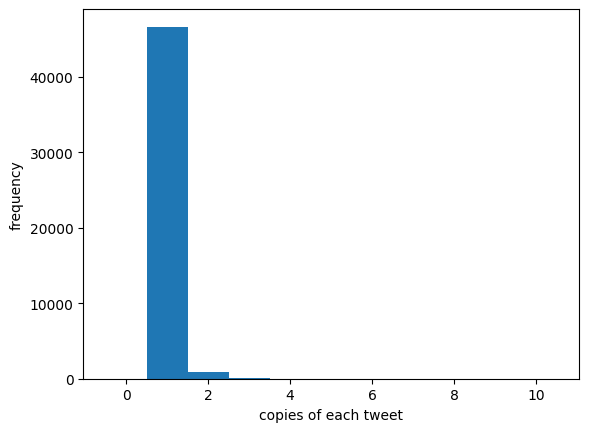

In [11]:
# number of times each tweet appears
counts = df.groupby(['text']).size()\
           .reset_index(name='counts')\
           .counts

# define bins for histogram
my_bins = np.arange(0,counts.max()+2, 1)-0.5

# plot histogram of tweet counts
plt.figure()
plt.hist(counts, bins = my_bins)
plt.xlabels = np.arange(1,counts.max()+1, 1)
plt.xlabel('copies of each tweet')
plt.ylabel('frequency')
plt.show()

In [13]:
def find_retweeted(text):
    '''This function will extract the twitter handles of retweed people'''
    return re.findall('(?<=RT\s)(@[A-Za-z]+[A-Za-z0-9-_]+)', text)

def find_mentioned(text):
    '''This function will extract the twitter handles of people mentioned in the tweet'''
    return re.findall('(?<!RT\s)(@[A-Za-z]+[A-Za-z0-9-_]+)', text)  

def find_hashtags(text):
    '''This function will extract hashtags'''
    return re.findall('(#[A-Za-z]+[A-Za-z0-9-_]+)', text)   

In [15]:
# two sample tweets
my_tweet = 'RT @our_codingclub: Can @you find #all the #hashtags?'
my_other_tweet = 'Not a retweet. All views @my own'

In [17]:
# make new columns for retweeted usernames, mentioned usernames and hashtags
df['retweeted'] = df.text.apply(find_retweeted)
df['mentioned'] = df.text.apply(find_mentioned)
df['hashtags'] = df.text.apply(find_hashtags)
df

,Unnamed: 0,source,created date,ID,text,type,retweet_count,reply_count,like_count,quote_count,...,sentiment_score,sentiment_label,Topic,Category,Hashtag_Mention,Media,is_retweet,retweeted,mentioned,hashtags
0,0,LFHW_UK,2023-03-10T12:23:27.000Z,1634168086201860096,@vegboxdonations Wonderful! Thank you for gett...,Reply,0,0,0,0,...,0.7574,positive,Charity,Hashtag,Hashtag&Mention,No Media,False,[],[@vegboxdonations],[#FoodWasteActionWeek]
1,1,LFHW_UK,2023-03-08T11:49:44.000Z,1633434822575109888,@CedarwoodTrust 👏,Reply,0,0,0,0,...,0.0000,neutral,Community Mobilisation,NaN,Mention,No Media,False,[],[@CedarwoodTrust],[]
2,2,LFHW_UK,2022-12-15T11:49:17.000Z,1603356519260720128,@NrthrnSoulKitch Looks delicious 😋 thank you f...,Reply,0,0,0,0,...,0.8750,positive,Community Mobilisation,NaN,Mention,No Media,False,[],[@NrthrnSoulKitch],[]
3,3,LFHW_UK,2022-12-15T11:48:23.000Z,1603356292478810112,@oxfordenvsust @Waste2TasteOx @ExeterCollegeOx...,Reply,0,0,0,0,...,0.6239,positive,Community Mobilisation,NaN,Mention,No Media,False,[],"[@oxfordenvsust, @Waste2TasteOx, @ExeterColleg...",[]
4,4,LFHW_UK,2022-12-08T13:35:17.000Z,1600846477416329984,@freeglehertford @allrecipesuk We absolutely l...,Reply,0,0,0,0,...,0.8264,positive,Handling Leftovers,NaN,Mention,No Media,False,[],"[@freeglehertford, @allrecipesuk]",[]
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48505,48505,Foodwasteactionweek,2023-03-10T07:54:47.000Z,1634100473719389952,🧅Add 2nd layer of potatoes and then pour over ...,Reply,0,0,2,0,...,0.2023,positive,Handling Leftovers,Hashtag&Media,Hashtag,Media,False,[],[],"[#foodwasteactionweek, #recipe, #loveyourlefto..."
48506,48506,Foodwasteactionweek,2021-03-03T12:10:52.000Z,1367085059367399936,🧐 Do you check Use By and Best Before dates? _...,Tweet,2,0,1,0,...,0.7788,positive,Community Mobilisation,Hashtag&Media,Hashtag,Media,False,[],[],"[#FoodWasteActionWeek, #LoveFoodHateWaste]"
48507,48507,Foodwasteactionweek,2021-03-03T10:52:39.000Z,1367065379277779968,"🧐 To mark @WRAP_UK's #FoodWasteActionWeek, wha...",Reply,3,0,8,1,...,-0.4215,negative,Community Mobilisation,Hashtag&Media,Hashtag&Mention,Media,False,[],"[@WRAP_UK, @OddboxLDN]",[#FoodWasteActionWeek]
48508,48508,Foodwasteactionweek,2022-03-31T13:06:58.000Z,1509517610685230080,🧑‍🎓🧩⚙️💚RT: #EITFood_x000D_\n➡️The #CircularEco...,Tweet,0,0,0,0,...,0.1779,positive,Charity,Hashtag&Media,Hashtag,Media,False,[],[],"[#EITFood_x000D_, #CircularEconomy, #EC, #Food..."


In [19]:
# take the rows from the hashtag columns where there are actually hashtags
hashtags_list_df = df.loc[
                       df.hashtags.apply(
                           lambda hashtags_list: hashtags_list !=[]
                       ),['hashtags']]
hashtags_list_df

,hashtags
0,[#FoodWasteActionWeek]
44,[#FoodWasteActionWeek]
45,[#FoodWasteActionWeek]
46,[#FoodWasteActionWeek]
47,[#FoodWasteActionWeek]
...,...
48505,"[#foodwasteactionweek, #recipe, #loveyourlefto..."
48506,"[#FoodWasteActionWeek, #LoveFoodHateWaste]"
48507,[#FoodWasteActionWeek]
48508,"[#EITFood_x000D_, #CircularEconomy, #EC, #Food..."


In [21]:
# create dataframe where each use of hashtag gets its own row
flattened_hashtags_df = pd.DataFrame(
    [hashtag for hashtags_list in hashtags_list_df.hashtags
    for hashtag in hashtags_list],
    columns=['hashtag'])
flattened_hashtags_df

,hashtag
0,#FoodWasteActionWeek
1,#FoodWasteActionWeek
2,#FoodWasteActionWeek
3,#FoodWasteActionWeek
4,#FoodWasteActionWeek
...,...
53818,#FoodWaste
53819,#FoodLoss
53820,#zerowaste
53821,#foodwasteactionweek


In [34]:
from tabulate import tabulate
# count of appearances of each hashtag
popular_hashtags = flattened_hashtags_df.groupby('hashtag').size()\
                                        .reset_index(name='counts')\
                                        .sort_values('counts', ascending=False)\
                                        .reset_index(drop=True)
# Display the title and the table with gridlines
print("Top 10 Hashtags")
print(tabulate(popular_hashtags.head(10), headers="keys", tablefmt="grid", floatfmt=".4f"))

Top 10 Hashtags
+----+-----------------------------+----------+
|    | hashtag                     |   counts |
+====+=============================+==========+
|  0 | #FoodWasteActionWeek        |    10425 |
+----+-----------------------------+----------+
|  1 | #foodwaste                  |     2676 |
+----+-----------------------------+----------+
|  2 | #LoveFoodHateWaste          |     1889 |
+----+-----------------------------+----------+
|  3 | #feedpeoplefirst            |     1320 |
+----+-----------------------------+----------+
|  4 | #surplusfood                |     1257 |
+----+-----------------------------+----------+
|  5 | #everycanhelps              |      838 |
+----+-----------------------------+----------+
|  6 | #FoodWaste                  |      710 |
+----+-----------------------------+----------+
|  7 | #foodwasteactionweek        |      571 |
+----+-----------------------------+----------+
|  8 | #food                       |      365 |
+----+------------------

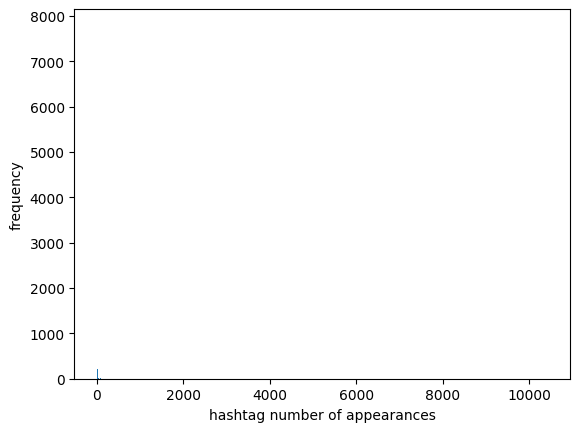

In [40]:
# number of times each hashtag appears
counts = flattened_hashtags_df.groupby(['hashtag']).size()\
                              .reset_index(name='counts')\
                              .counts

# define bins for histogram                              
my_bins = np.arange(0,counts.max()+2, 5)-0.5

# plot histogram of tweet counts
plt.figure()
plt.hist(counts, bins = my_bins)
plt.xlabels = np.arange(1,counts.max()+1, 1)
plt.xlabel('hashtag number of appearances')
plt.ylabel('frequency')
plt.show()

In [42]:
# take hashtags which appear at least this amount of times
min_appearance = 100
# find popular hashtags - make into python set for efficiency
popular_hashtags_set = set(popular_hashtags[
                           popular_hashtags.counts>=min_appearance
                           ]['hashtag'])

In [44]:
# make a new column with only the popular hashtags
hashtags_list_df['popular_hashtags'] = hashtags_list_df.hashtags.apply(
            lambda hashtag_list: [hashtag for hashtag in hashtag_list
                                  if hashtag in popular_hashtags_set])
# drop rows without popular hashtag
popular_hashtags_list_df = hashtags_list_df.loc[
            hashtags_list_df.popular_hashtags.apply(lambda hashtag_list: hashtag_list !=[])]

In [46]:
# make new dataframe
hashtag_vector_df = popular_hashtags_list_df.loc[:, ['popular_hashtags']]

for hashtag in popular_hashtags_set:
    # make columns to encode presence of hashtags
    hashtag_vector_df['{}'.format(hashtag)] = hashtag_vector_df.popular_hashtags.apply(
        lambda hashtag_list: int(hashtag in hashtag_list))

In [48]:
hashtag_vector_df

,popular_hashtags,#foodwaste,#FoodWaste,#FoodHeroes,#FeedPeopleFirst,#surplusfood,#FoodWasteActionWeek_x000D_,#FareShareFoodCloud,#food,#zerowaste,...,#Volunteer,#Christmas,#recipe,#wastenot,#WasteLessFood,#GuardiansOfGrub,#foodpoverty,#meatyissues,#waste,#volunteer
0,[#FoodWasteActionWeek],0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
44,[#FoodWasteActionWeek],0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
45,[#FoodWasteActionWeek],0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
46,[#FoodWasteActionWeek],0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
47,[#FoodWasteActionWeek],0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48505,"[#foodwasteactionweek, #recipe]",0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
48506,"[#FoodWasteActionWeek, #LoveFoodHateWaste]",0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
48507,[#FoodWasteActionWeek],0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
48508,"[#FoodWasteActionWeek, #FoodWaste]",0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [50]:
hashtag_matrix = hashtag_vector_df.drop('popular_hashtags', axis=1)

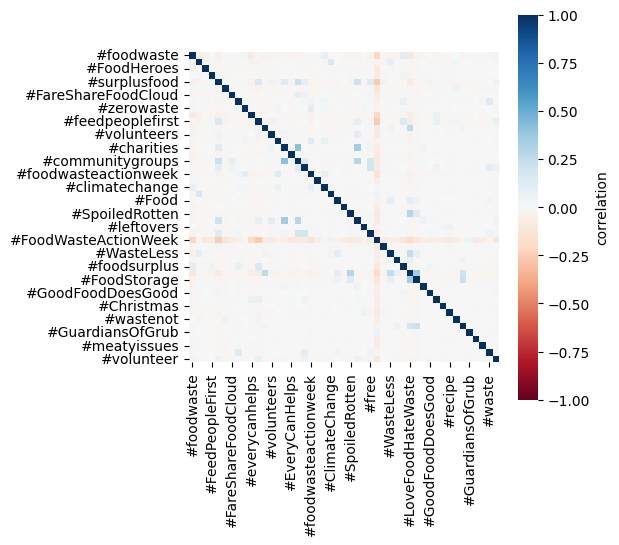

In [52]:
# calculate the correlation matrix
correlations = hashtag_matrix.corr()

# plot the correlation matrix
plt.figure(figsize=(5,5))
sns.heatmap(correlations,
    cmap='RdBu',
    vmin=-1,
    vmax=1,
    square = True,
    cbar_kws={'label':'correlation'})
plt.show()

In [54]:
# take the rows from the mentioned columns where there are actually hashtags
mentioned = df.loc[
                       df.mentioned.apply(
                           lambda mentioned: mentioned !=[]
                       ),['mentioned']]
mentioned

,mentioned
0,[@vegboxdonations]
1,[@CedarwoodTrust]
2,[@NrthrnSoulKitch]
3,"[@oxfordenvsust, @Waste2TasteOx, @ExeterColleg..."
4,"[@freeglehertford, @allrecipesuk]"
...,...
48498,[@WRAP_UK]
48501,"[@HuwSayer, @hubbubUK, @LFHW_UK, @foodsavvysfk..."
48502,[@WRAP_UK]
48504,[@LFHW_UK_x000D_]


In [56]:
# create dataframe where each use of mention gets its own row
flattened_mentioned_df = pd.DataFrame(
    [mentioned for mentioned_list in mentioned.mentioned
    for mentioned in mentioned_list],
    columns=['mentioned'])
flattened_mentioned_df

,mentioned
0,@vegboxdonations
1,@CedarwoodTrust
2,@NrthrnSoulKitch
3,@oxfordenvsust
4,@Waste2TasteOx
...,...
47696,@NorfolkCC
47697,@WRAP_UK
47698,@LFHW_UK_x000D_
47699,@WRAP_UK


In [66]:
from tabulate import tabulate
# count of appearances of each mention
popular_mentioned = flattened_mentioned_df.groupby('mentioned').size()\
                                        .reset_index(name='counts')\
                                        .sort_values('counts', ascending=False)\
                                        .reset_index(drop=True)

# Print title and top 10 mentions
print("Top 10 Mentions")
print(tabulate(popular_mentioned.head(10), headers="keys", tablefmt="grid", floatfmt=".4f"))

Top 10 Mentions
+----+-----------------+----------+
|    | mentioned       |   counts |
+====+=================+==========+
|  0 | @FareShareUK    |     6237 |
+----+-----------------+----------+
|  1 | @LFHW_UK        |     4318 |
+----+-----------------+----------+
|  2 | @Tesco          |     1377 |
+----+-----------------+----------+
|  3 | @WRAP_UK        |     1151 |
+----+-----------------+----------+
|  4 | @TrussellTrust  |      493 |
+----+-----------------+----------+
|  5 | @MarcusRashford |      251 |
+----+-----------------+----------+
|  6 | @FareShareLON   |      247 |
+----+-----------------+----------+
|  7 | @FareShareYorks |      239 |
+----+-----------------+----------+
|  8 | @FareShareGtrM  |      207 |
+----+-----------------+----------+
|  9 | @asda           |      186 |
+----+-----------------+----------+


In [85]:
# take mention which appear at least this amount of times
min_appearance = 50
# find popular mention - make into python set for efficiency
popular_mentioned_set = set(popular_mentioned[
                           popular_mentioned.counts>=min_appearance
                           ]['mentioned'])

In [86]:
# make a new column with only the popular mentions
mentioned['popular_mentioned'] = mentioned.mentioned.apply(
            lambda mentioned_list: [mentioned for mentioned in mentioned_list
                                  if mentioned in popular_mentioned_set])
# drop rows without popular mentions
popular_mentioned = mentioned.loc[
            mentioned.popular_mentioned.apply(lambda mentioned_list: mentioned_list !=[])]

In [87]:
# make new dataframe
mentioned_vector_df = popular_mentioned.loc[:, ['popular_mentioned']]

for mentioned in popular_mentioned_set:
    # make columns to encode presence of mentions
    mentioned_vector_df['{}'.format(mentioned)] = mentioned_vector_df.popular_mentioned.apply(
        lambda mentioned_list: int(mentioned in mentioned_list))

In [88]:
mentioned_vector_df

,popular_mentioned,@ChefTomKerridge,@MarcusRashford,@lfhw_uk,@wwf_uk,@LFHW_UK,@OLIO_ex,@foodwaste,@recycle_now,@VeoliaUK,...,@TrussellTrust,@marksandspencer,@wrap,@DefraGovUK,@Tesco,@IFAN_UK,@MarcusGover,@Stop_Food_Waste,@TooGoodToGo_UK,@Comms_IGD
5,[@FareShareUK],0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8,[@FareShareUK],0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
20,[@FareShareUK],0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
22,[@WRAP_UK],0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
28,[@WRAP_UK],0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24538,[@FareShareUK],0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
24539,[@Tesco],0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
24540,[@FareShareUK],0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
24545,[@FareShareUK],0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


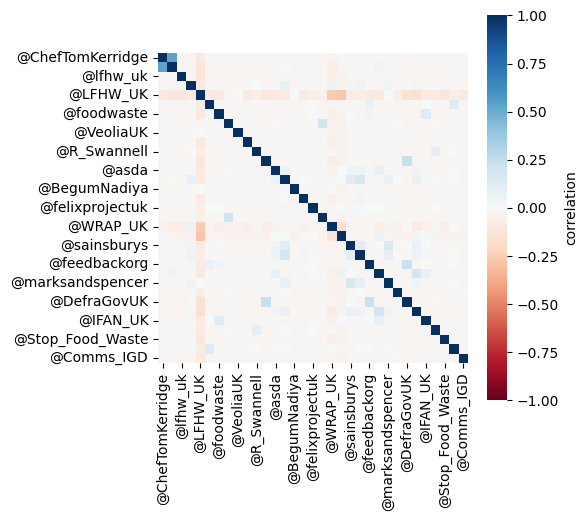

In [89]:
mentioned_matrix = mentioned_vector_df.drop('popular_mentioned', axis=1)
# calculate the correlation matrix
correlations = mentioned_matrix.corr()

# plot the correlation matrix
plt.figure(figsize=(5,5))
sns.heatmap(correlations,
    cmap='RdBu',
    vmin=-1,
    vmax=1,
    square = True,
    cbar_kws={'label':'correlation'})
plt.show()

In [90]:
import pandas as pd
import matplotlib.pyplot as plt

In [91]:
df = pd.read_excel('All_Tweets_wo duplicates_with8ktweet.xlsx')

In [92]:
df['created_at'] = pd.to_datetime(df['created_at'], utc=True,format='mixed')

In [93]:
df = df.dropna(subset=['created_at'])

In [94]:
df = df[(df['created_at'].dt.year >= 2019) & (df['created_at'].dt.year <= 2023)]

In [95]:
df['year'] = df['created_at'].dt.year

In [96]:
grouped_data = df.groupby('year').size().reset_index(name='tweet_count')

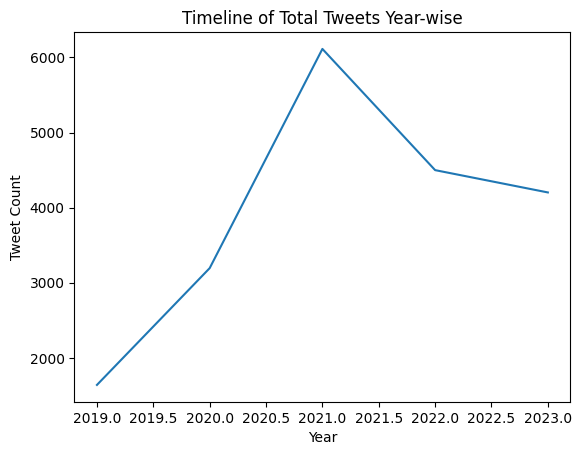

In [97]:
plt.plot(grouped_data['year'], grouped_data['tweet_count'])
plt.title('Timeline of Total Tweets Year-wise')
plt.xlabel('Year')
plt.ylabel('Tweet Count')
plt.show()

In [117]:
top_views = df.nlargest(4, 'view_count')[['text', 'view_count', 'Source file']]

# Print the title
print("\n\033[1mTweets with Maximum Views\033[0m\n")

# Print each tweet and view count
for index, row in top_views.iterrows():
    truncated_text = row['text'][:120]
    print(f"Tweet: {truncated_text}")
    print(f"View Count: {row['view_count']}")
    print(f"Source: {row['Source file']}")
    print("\n" + "="*100 + "\n")


Tweets with Maximum Views

Tweet: This Saturday between 12 - 1pm, you could find a golden token in over 100 Tesco stores as part of Tesco Stronger Starts.
View Count: 2788420.0
Source: @FareShareUK


Tweet: Which is better? 🌎 ♻️
Plastic bags, paper bags or cloth bags? 

Let's hear what #DonNorman had to say.

Start designing 
View Count: 1781308.0
Source: LFHW_UK_tweets


Tweet: It's #IDAFLW - International Day of Food Loss &amp; Waste!

#DidYouKnow that 1/3 of all the food produced for humans to 
View Count: 761754.0
Source: @Stop_Food_Waste


Tweet: Introducing the extraordinary Class of 2023 ✨

15 incredible environmental solutions to repair our planet 🌎

Read everyt
View Count: 216735.0
Source: WRAP_UK_tweets




In [118]:
top_retweets = df.nlargest(5,'retweet_count')[['text','retweet_count']]

# Print the title
print("\n\033[1mMost Retweeted Tweets\033[0m\n")

# Print each tweet and view count
for index, row in top_retweets.iterrows():
    truncated_text = row['text'][:100]
    print(f"Tweet: {truncated_text}")
    print(f"Retweet Count: {row['retweet_count']}")
    print("\n" + "="*50 + "\n")


Most Retweeted Tweets

Tweet: It’s time to say #EnoughlsEnough 

This Saturday, October 1st, we’ll be protesting in 50 cities and 
Retweet Count: 5274.0


Tweet: The people:

🍝 6.7 million in food poverty

👩‍⚕️ 6.8 million on NHS waiting lists

🔋 5 million unabl
Retweet Count: 4649.0


Tweet: There is a growing and numbing realisation of just how bad Sunak's budget really was. Worse, he’s ev
Retweet Count: 4442.0


Tweet: BT Group profits: £1,300,000,000

Royal Mail profits: £753,000,000

Abellio Rail profits: £305,000,0
Retweet Count: 2771.0


Tweet: It is morally indefensible that @trussliz has given tax cuts to the richest in our society and yet h
Retweet Count: 2735.0




In [55]:
## Tweets with the popuar keywords as per wordcloud
keywords = ['thank', 'support', 'help', 'need']
filtered_tweets = df[df['text'].str.contains('|'.join(keywords), case=False)].head(6)

In [56]:
for index, row in filtered_tweets.iterrows():
    print(f"Tweet: {row['text']}")
    print("\n" + "="*50 + "\n") 

Tweet: This Saturday between 12 - 1pm, you could find a golden token in over 100 Tesco stores as part of Tesco Stronger Starts. That's a £5,000 golden grant to fund healthy food and activities to help a children’s group thrive in your area. https://t.co/YCOiTY3QNz


Tweet: Introducing the extraordinary Class of 2023 ✨

15 incredible environmental solutions to repair our planet 🌎

Read everything you need to know here: https://t.co/pjQwSwMNqw https://t.co/ZoxVv6yPnd


Tweet: 🧵 We live in one of the wealthiest countries in the world, and yet people in the UK are going without the essentials we all need to get by.

We can’t always deal with what life throws at us on our own, and we need a system in place that supports us all. ⤵️ https://t.co/6mkW4yVUPU


Tweet: Support Our Be a Sponsor Initiative. Join as a Sponsor!


Tweet: Millions are being forced into food insecurity by the cost of living crisis. Sign the petition calling on the Government to support @fareshareUK to get more food to p

In [57]:
import re

In [58]:
print("\n\033[1mTweets with at least one hashtag or URL\033[0m\n")


Tweets with at least one hashtag or URL



In [59]:
tweets_with_hashtag_or_url_count = 0
pattern = re.compile(r'#\w+|https?://\S+')
for index, row in top_views.iterrows():
    truncated_text = row['text'][:200]
    print(f"Tweet: {truncated_text}")

Tweet: This Saturday between 12 - 1pm, you could find a golden token in over 100 Tesco stores as part of Tesco Stronger Starts. That's a £5,000 golden grant to fund healthy food and activities to help a chil
Tweet: Which is better? 🌎 ♻️
Plastic bags, paper bags or cloth bags? 

Let's hear what #DonNorman had to say.

Start designing for a better world by joining Don Norman's latest course: https://t.co/CGJ9aB7TX
Tweet: It's #IDAFLW - International Day of Food Loss &amp; Waste!

#DidYouKnow that 1/3 of all the food produced for humans to eat is lost or wasted, and much of this waste occurs at home? 🗑️🏠

Try our 🆕 foo
Tweet: Introducing the extraordinary Class of 2023 ✨

15 incredible environmental solutions to repair our planet 🌎

Read everything you need to know here: https://t.co/pjQwSwMNqw https://t.co/ZoxVv6yPnd
Tweet: Can you believe that #StopFoodWasteDay is tomorrow?

With only 1 day left, why not save those stems, stalks and leaves and make this hearty and warming Whole Cauliflo

In [60]:
if pattern.search(row['text']):
        print("Contains at least one hashtag or URL")
        tweets_with_hashtag_or_url_count += 1
else:
    print("Does not contain a hashtag or URL")
    
    print("\n" + "="*50 + "\n")

Contains at least one hashtag or URL


In [61]:
print(f"Number of tweets with at least one hashtag or URL: {tweets_with_hashtag_or_url_count}")

Number of tweets with at least one hashtag or URL: 1
